In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2


scanpy==1.8.0.dev78+gc488909a anndata==0.7.5 umap==0.4.6 numpy==1.20.1 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
adata = sq.datasets.visium_hne_adata()

In [3]:
sq.gr.spatial_neighbors(adata)

Creating graph using `grid` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [4]:
# sq.gr.moran(adata, n_jobs=6)

In [5]:
fig, ax = plt.subplots(
    figsize=(3, 5),
)
g = "cluster"  # ["Nrgn", "Camk2n1", "Mobp", "cluster"]
sc.pl.spatial(
    adata,
    color=g,
    save=f"_moran_{g}.png",
    ax=ax,
    #     legend_loc=False,
    show=False,
)

In [5]:
sq.gr.ligrec(
    adata,
    cluster_key="cluster",
)

Fetching interactions from `omnipath`
Fetched `7607` interactions
    Finish (0:00:02)
Running `1000` permutations on `2080` interactions and `225` cluster combinations using `1` core(s)


Adding `adata.uns['cluster_ligrec']`
Finish (0:00:27)


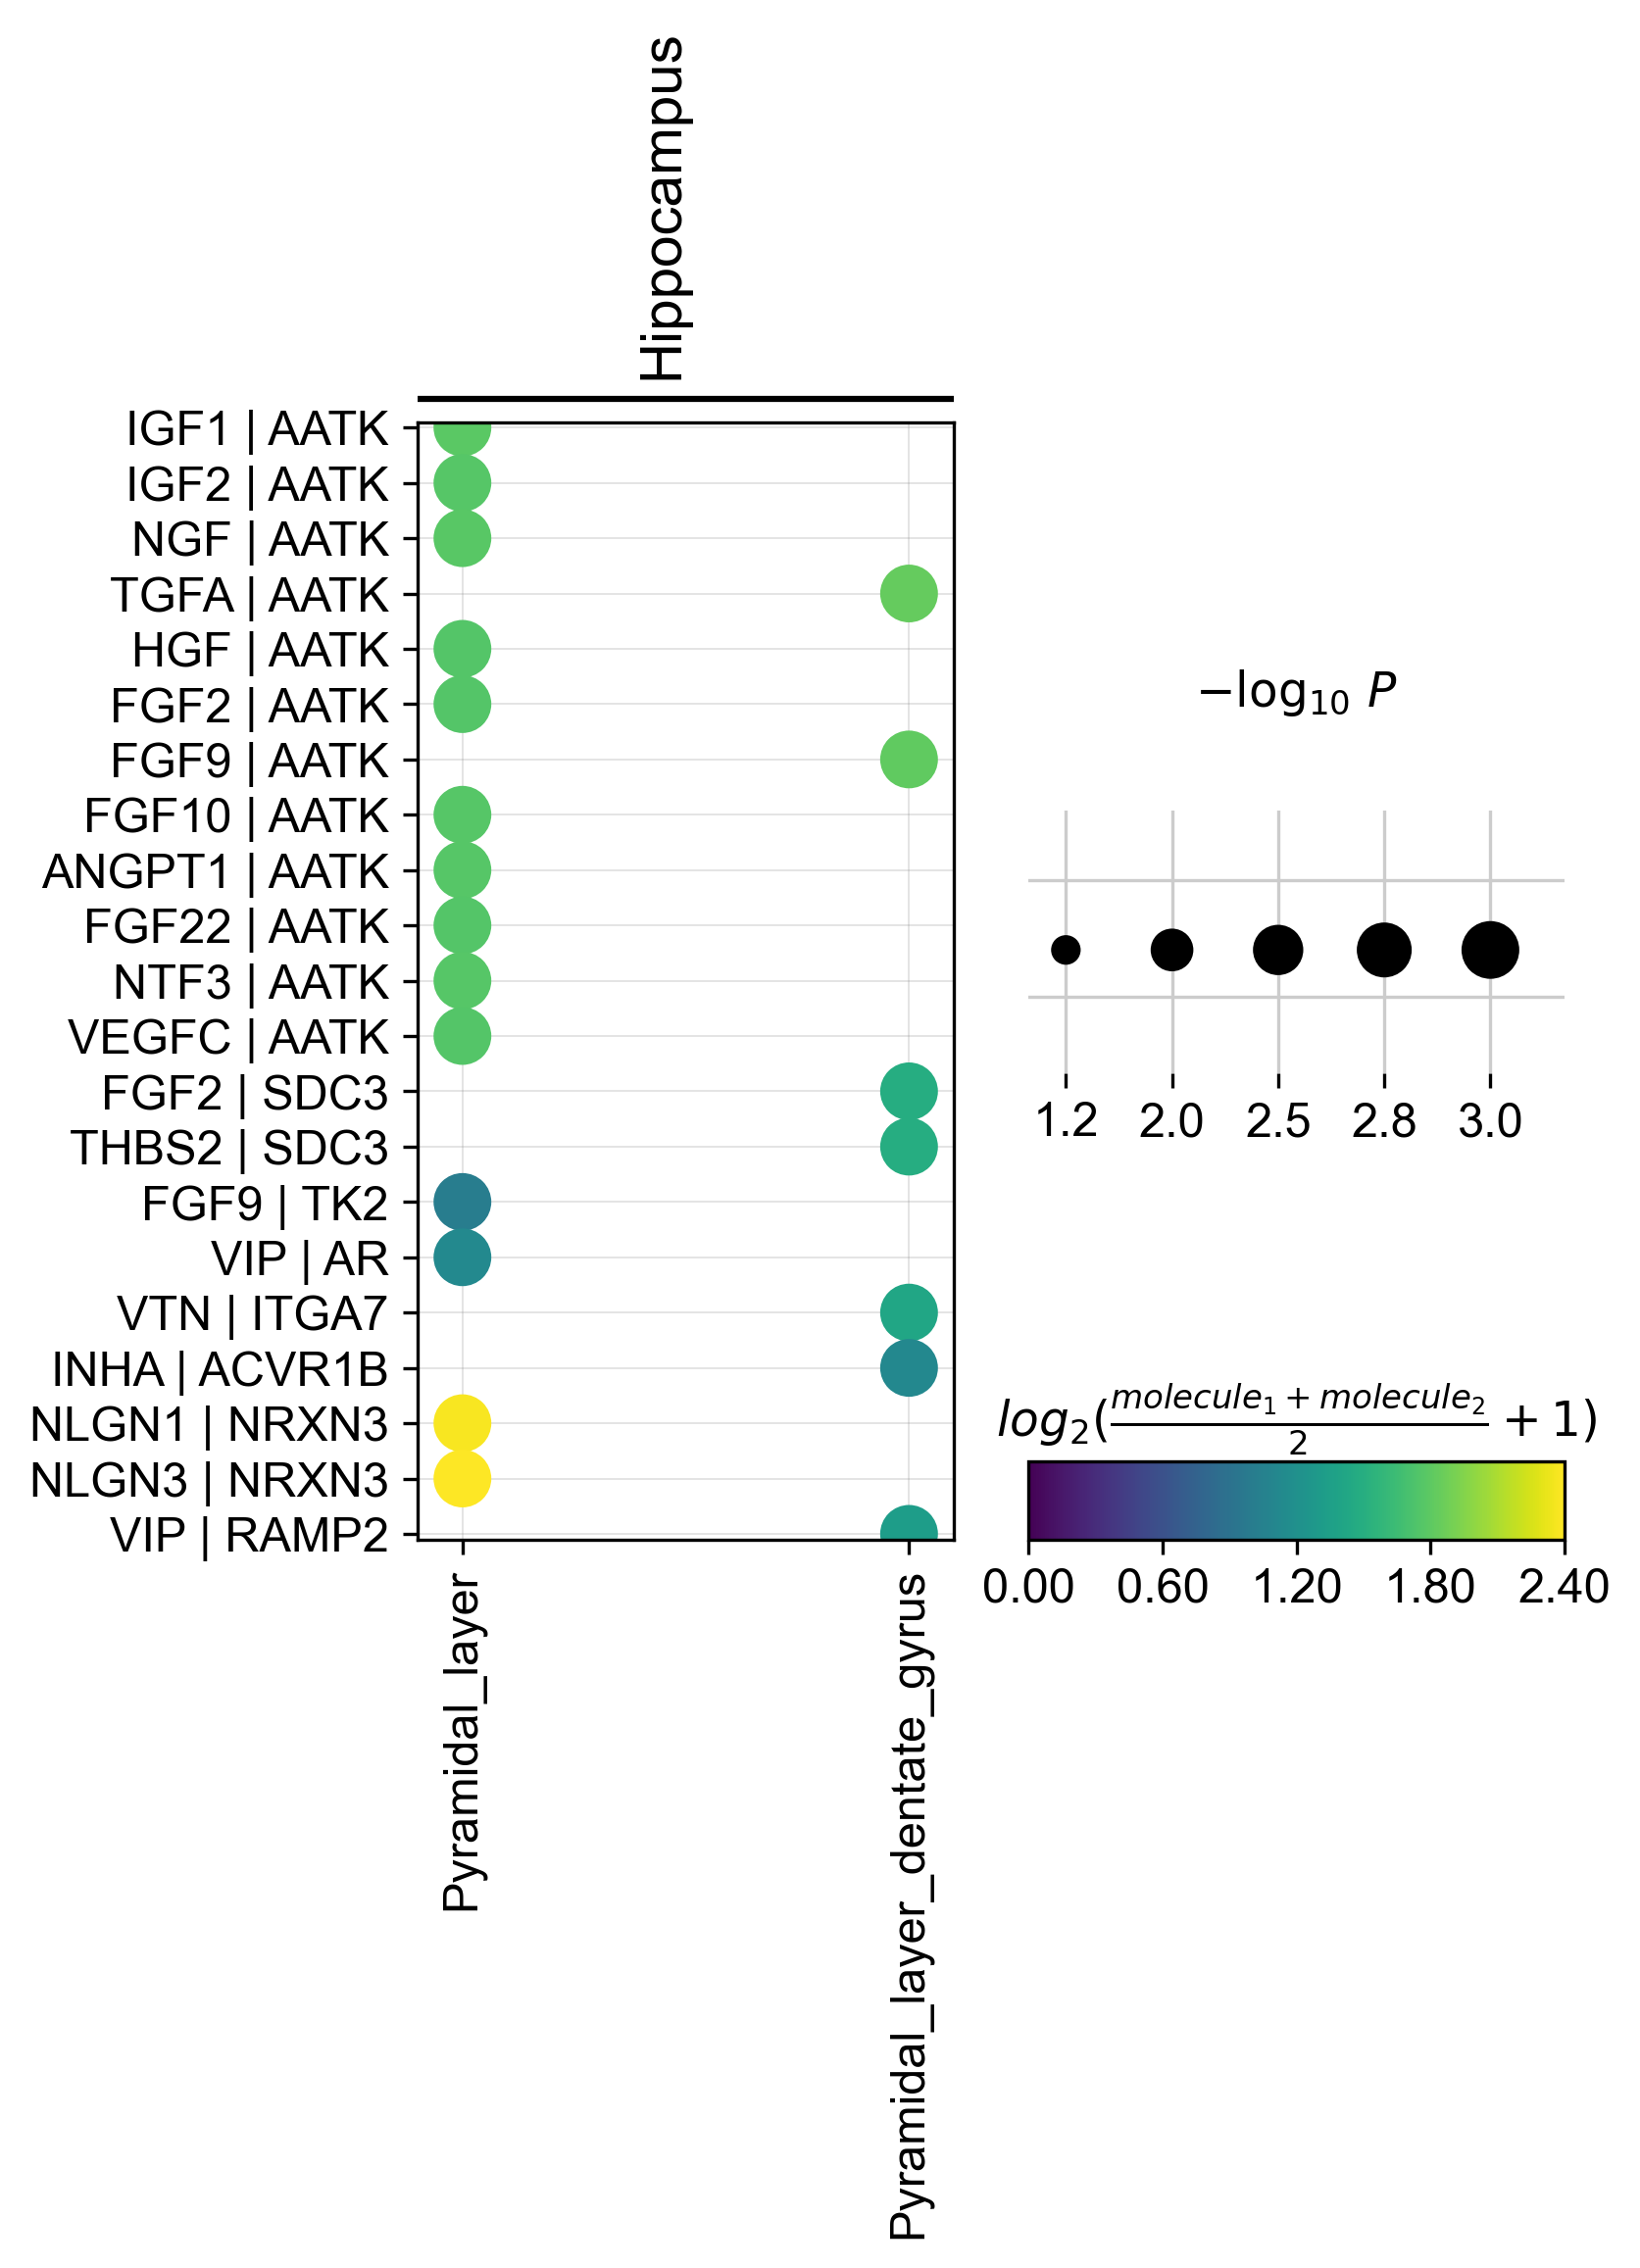

In [65]:
sq.pl.ligrec(
    adata,
    cluster_key="cluster",
    source_groups="Hippocampus",
    target_groups=["Pyramidal_layer", "Pyramidal_layer_dentate_gyrus"],
    means_range=(1, np.inf),
    pvalue_threshold=0.001,
    alpha=0.00001,
    swap_axes=False,
    dpi=300,
    title="",
    figsize=(5, 5),
    y_padding=0.1,
    x_padding=0.1,
    width=2.5,
    height=0.5,
    save="ligrec_visium.png",
)

In [4]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster")

Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['cluster_nhood_enrichment']`
Finish (0:00:07)


/Users/giovanni.palla/Projects/squidpy/squidpy/pl/_utils.py:573: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  col_ax = divider.append_axes("top", size="5%")


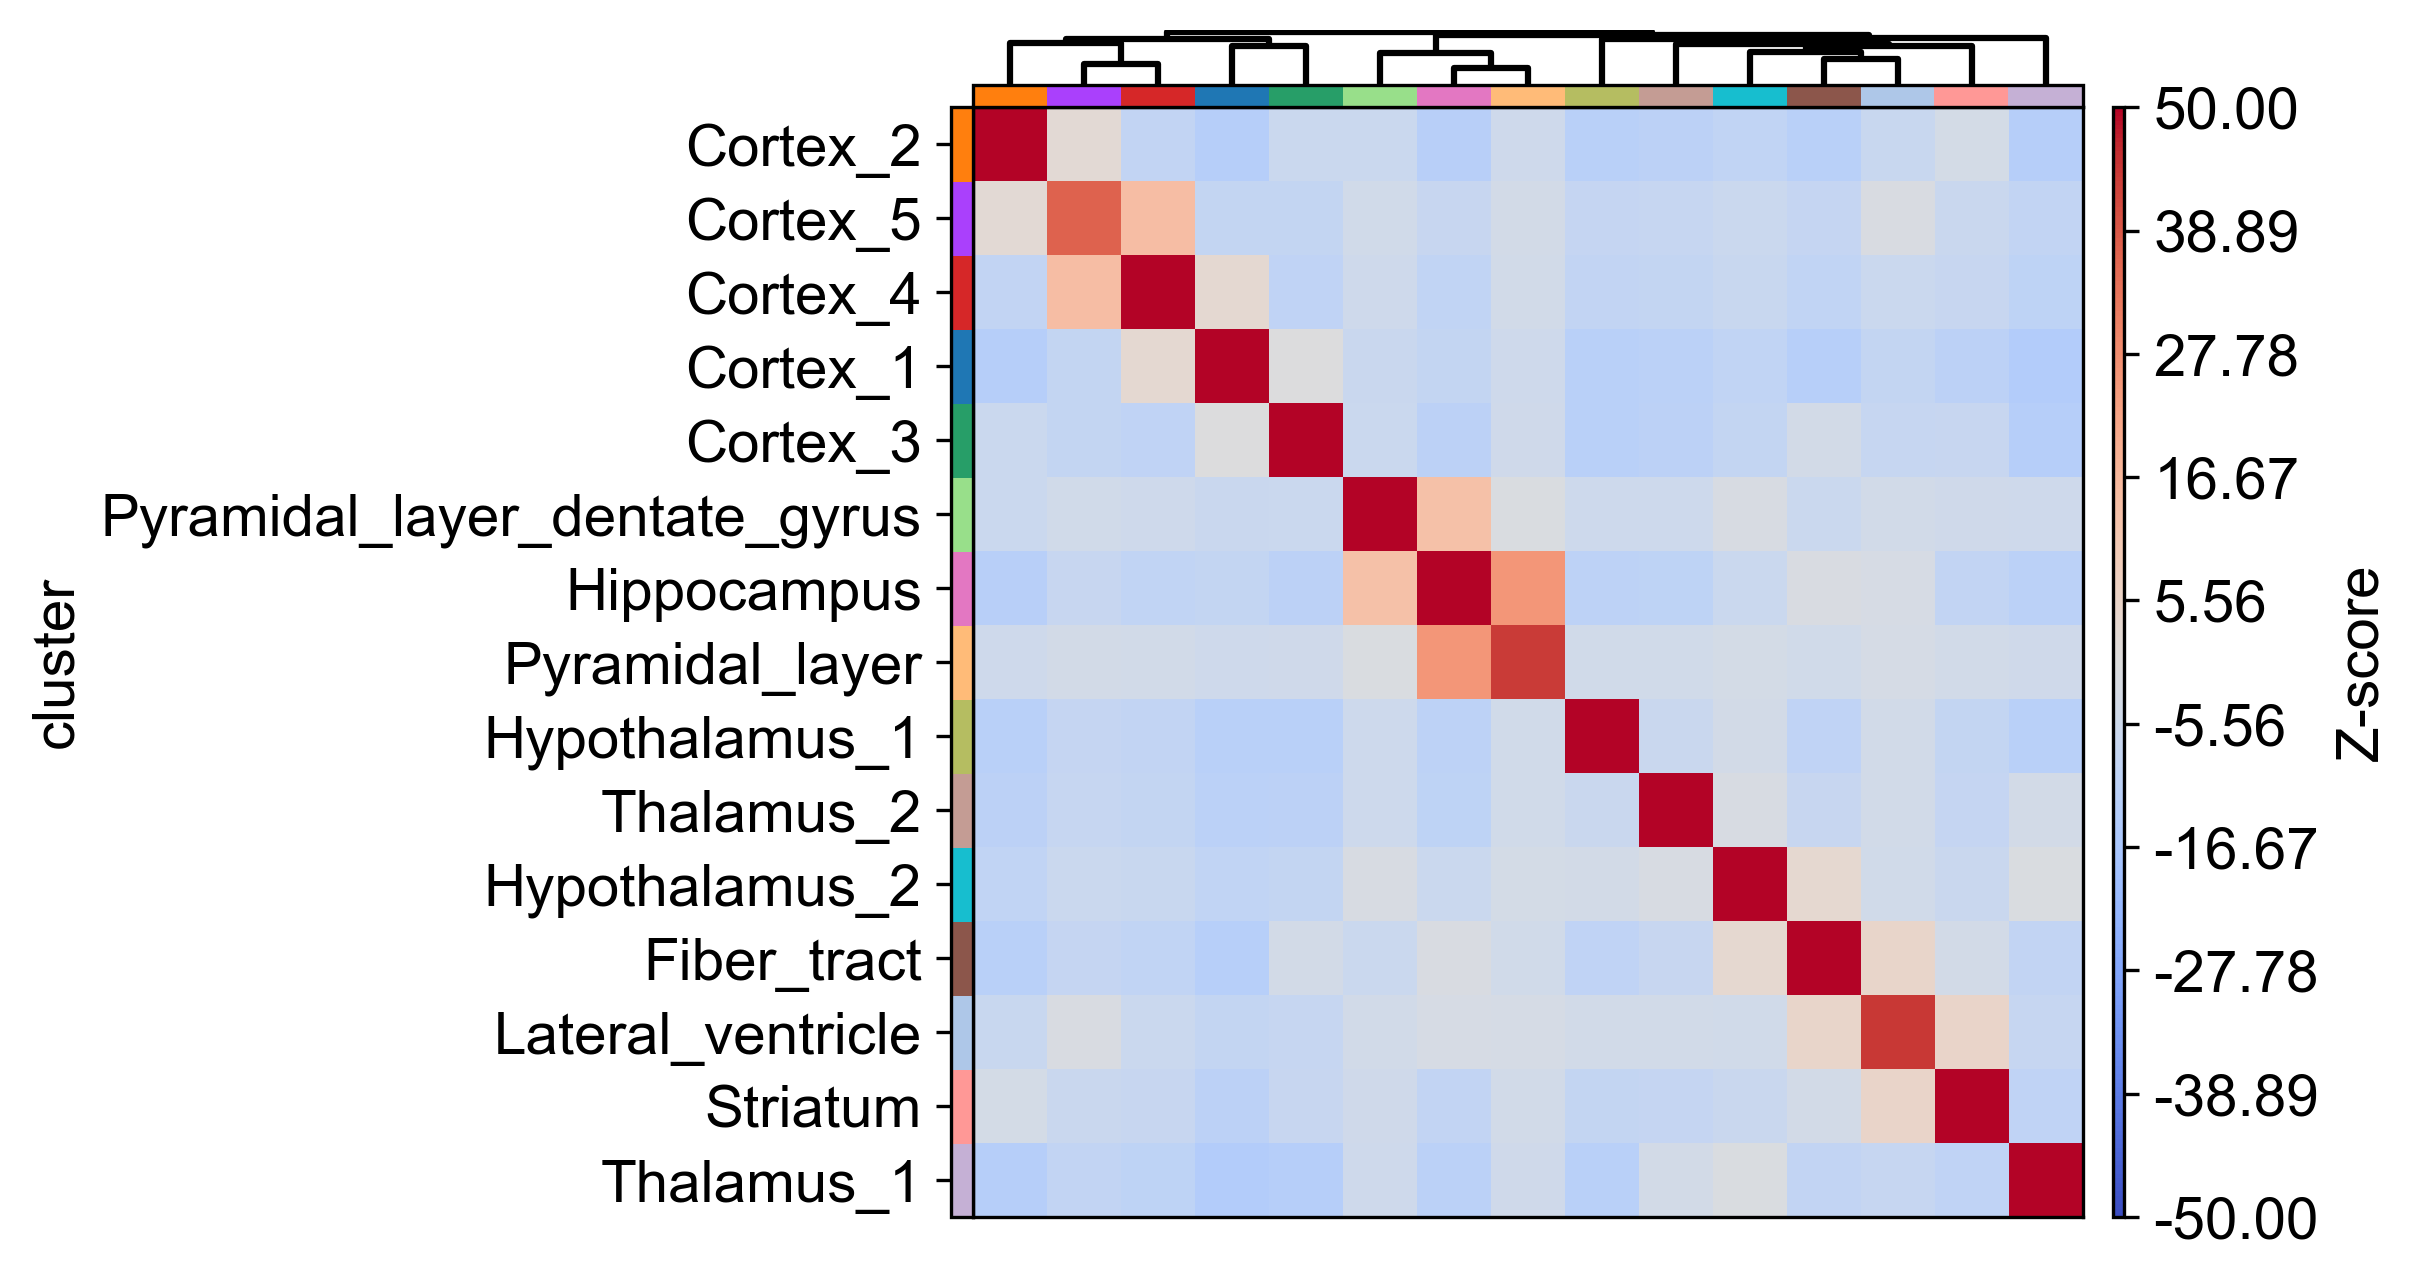

In [6]:
sq.pl.nhood_enrichment(
    adata,
    cluster_key="cluster",
    cmap="coolwarm",
    title="",
    method="ward",
    dpi=300,
    figsize=(5, 4),
#     save="nhod_seqfish.png",
    cbar_kwargs={"label": "Z-score"},
    vmin=-50,
    vmax=50,
)

In [8]:
genes = adata.var_names[(adata.var.n_cells > 100) & adata.var.highly_variable]

In [10]:
sq.gr.sepal(adata, max_neighs=6, genes=genes, n_jobs=8)
adata.uns["sepal_score"].head(10)

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Calculating sepal score for `2892` genes using `8` core(s)


  0%|          | 0/2892 [00:00<?, ?/s]

Adding `adata.uns['sepal_score']`
Finish (0:06:57)


,sepal_score
Tmem72,11.525
Col8a2,10.684
2900040C04Rik,10.059
Gm5741,9.828
Folr1,9.225
Spink8,9.034
Tnnt1,8.737
Abca4,8.488
Krt18,8.443
Calml4,8.351


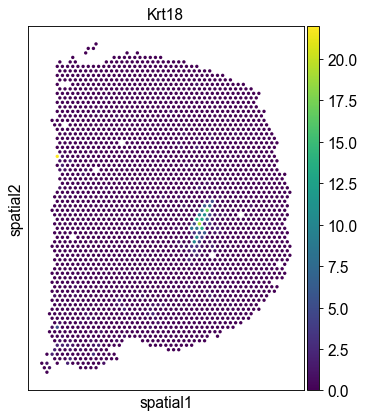

In [23]:
gene = "Krt18"
fig, ax = plt.subplots(
    figsize=(5, 6),
)
sc.pl.spatial(
    adata,
    color=[gene],
    img_key=None,
    save=f"_visium_{gene}.png",
    ax=ax,
    show=True,
)

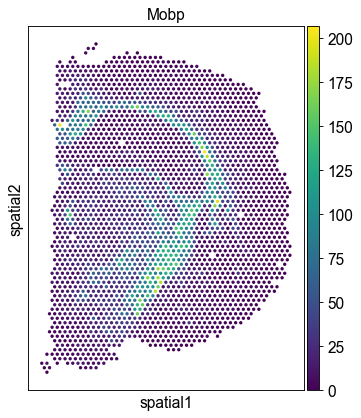

In [24]:
gene = "Mobp"
fig, ax = plt.subplots(
    figsize=(5, 6),
)
sc.pl.spatial(
    adata,
    color=[gene],
    img_key=None,
    save=f"_visium_{gene}.png",
    ax=ax,
    show=True,
)

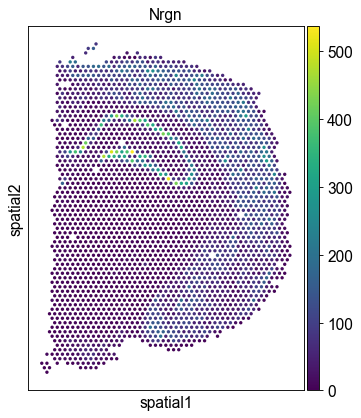

In [25]:
gene = "Nrgn"
fig, ax = plt.subplots(
    figsize=(5, 6),
)
sc.pl.spatial(
    adata,
    color=[gene],
    img_key=None,
    save=f"_visium_{gene}.png",
    ax=ax,
    show=True,
)

In [ ]:
sq.gr.co_occurrence